## Data Cleaning

Imputing missing values using Mean,Median and Mode.
Missing values in Categorical Varible(Eg.: Gender) - Use Mode( In Mode, it returns the maximum occuring value,which in turn can be used to replace the missing value)
Missing values in Numerical Varible - Use Mean or Median. In this if there is presence of outliers in data then use Median because they are not sensitive to presence of outliers and use Mean if there outliers are not present as they are sensitive to outliers.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Loan_dataset.csv')
df.head(5)

,Loan_ID,Gender,Marriage Status,Number of Dependant,Education Level,Are they self employed,Applicants income,Co-applicants income,Loan Amount,Loan Duration,Creditability,Property Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Marriage Status            3
Number of Dependant       15
Education Level            0
Are they self employed    32
Applicants income          0
Co-applicants income       0
Loan Amount               22
Loan Duration             14
Creditability             50
Property Area              0
Loan_Status                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Marriage Status         611 non-null    object 
 3   Number of Dependant     599 non-null    object 
 4   Education Level         614 non-null    object 
 5   Are they self employed  582 non-null    object 
 6   Applicants income       614 non-null    int64  
 7   Co-applicants income    614 non-null    float64
 8   Loan Amount             592 non-null    float64
 9   Loan Duration           600 non-null    float64
 10  Creditability           564 non-null    float64
 11  Property Area           614 non-null    object 
 12  Loan_Status             614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Marriage Status'].fillna(df['Marriage Status'].mode()[0],inplace=True)
df['Are they self employed'].fillna(df['Are they self employed'].mode()[0],inplace=True)
df['Number of Dependant'].fillna(df['Number of Dependant'].mode()[0],inplace=True)
df['Creditability'].fillna(df['Creditability'].mode()[0],inplace=True)
df['Loan Amount'] = df['Loan Amount'].fillna(df['Loan Amount'].mean())
df['Loan Duration'] = df['Loan Duration'].fillna(df['Loan Duration'].mean())

In [ ]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Marriage Status           0
Number of Dependant       0
Education Level           0
Are they self employed    0
Applicants income         0
Co-applicants income      0
Loan Amount               0
Loan Duration             0
Creditability             0
Property Area             0
Loan_Status               0
dtype: int64

## Outliers 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("BigMart.csv")
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

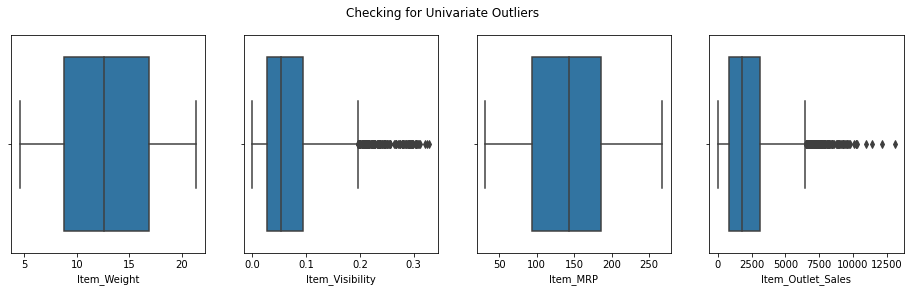

In [ ]:
#checking for univariate outliers
plt.rcParams['figure.figsize']=(16,4)

plt.subplot(1,4,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(1,4,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(1,4,3)
sns.boxplot(data['Item_MRP'])

plt.subplot(1,4,4)
sns.boxplot(data['Item_Outlet_Sales'])

plt.suptitle("Checking for Univariate Outliers")
plt.show()

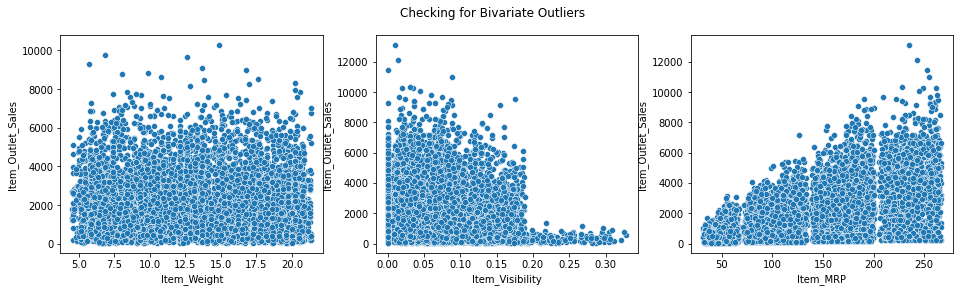

In [ ]:
#checking for bivariate outliers

plt.subplot(1,3,1)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Weight'])

plt.subplot(1,3,2)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Visibility'])

plt.subplot(1,3,3)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_MRP'])

plt.suptitle("Checking for Bivariate Outliers")
plt.show()

Capping Ouliers: Capping refers to replacing the outliers to the near value so we can keep the point in our analysis and it also does not skew the data.

In [ ]:
# capping the outliers in the column Item_Outlet_Sales having values greater then 10000
data['Item_Outlet_Sales'].values[data['Item_Outlet_Sales'].values>10000]=10000

In [ ]:
data[data['Item_Outlet_Sales']>10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
#Dealing with bivarite outliers
#deleting all the values greater then 8000
data=data[~(data['Item_Outlet_Sales']>8000)]

## Data Visulization

Univariate analysis: Analysing single variable

In [ ]:
df_e=pd.read_csv('employee.csv')
df_e.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


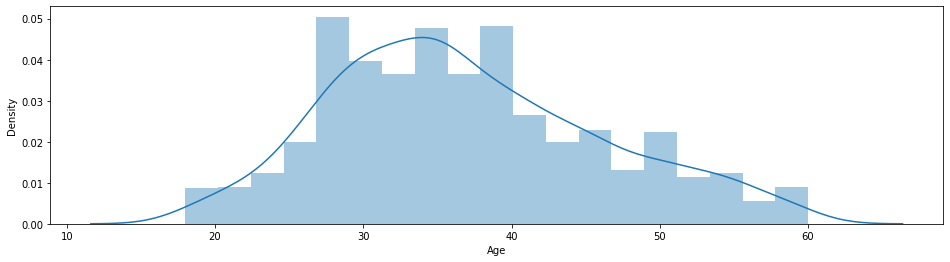

In [ ]:
#univariate analyses for numerical variable
sns.distplot(df_e['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


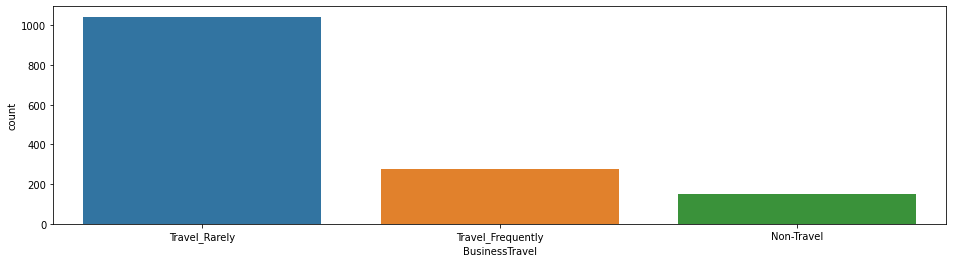

In [ ]:
#univariate analyses for categorical variable
sns.countplot(df_e['BusinessTravel'])

Bivariate analysis: Simultaneous analysis of two variables
There are two types of bivariate analysis: 1. Categorical v/s Numerical
2. Numerical v/s Numerical OR Countinuous v/s Continuous

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


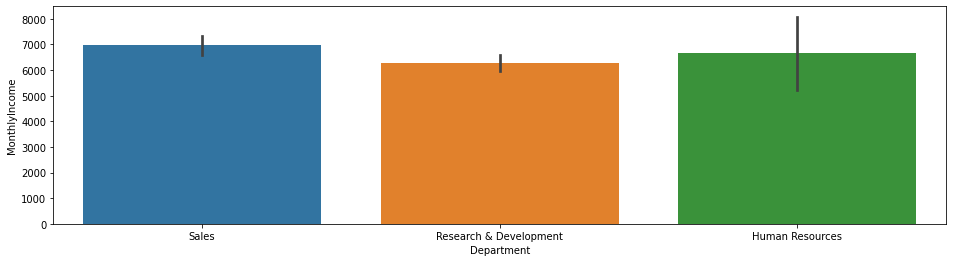

In [ ]:
#bivariate analyses for categorical v/s numerical variable
sns.barplot(df_e['Department'],df_e['MonthlyIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


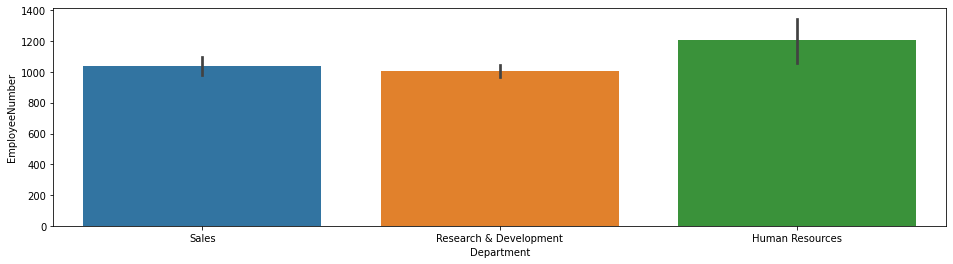

In [ ]:
sns.barplot(df_e['Department'],df_e['EmployeeNumber'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


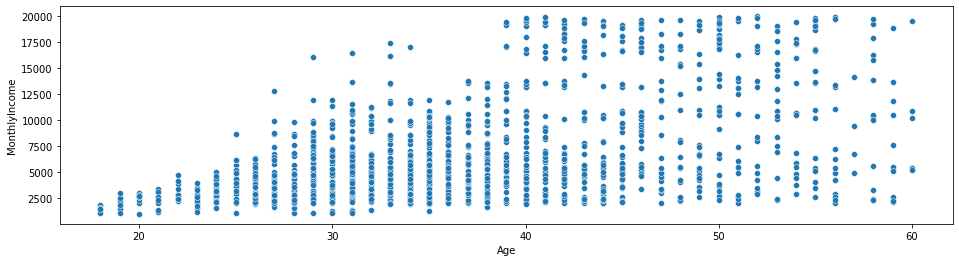

In [ ]:
#bivariate analyses for numerical v/s numerical variable
sns.scatterplot(df_e['Age'],df_e['MonthlyIncome'])

Multivariate Analysis

Heat Map

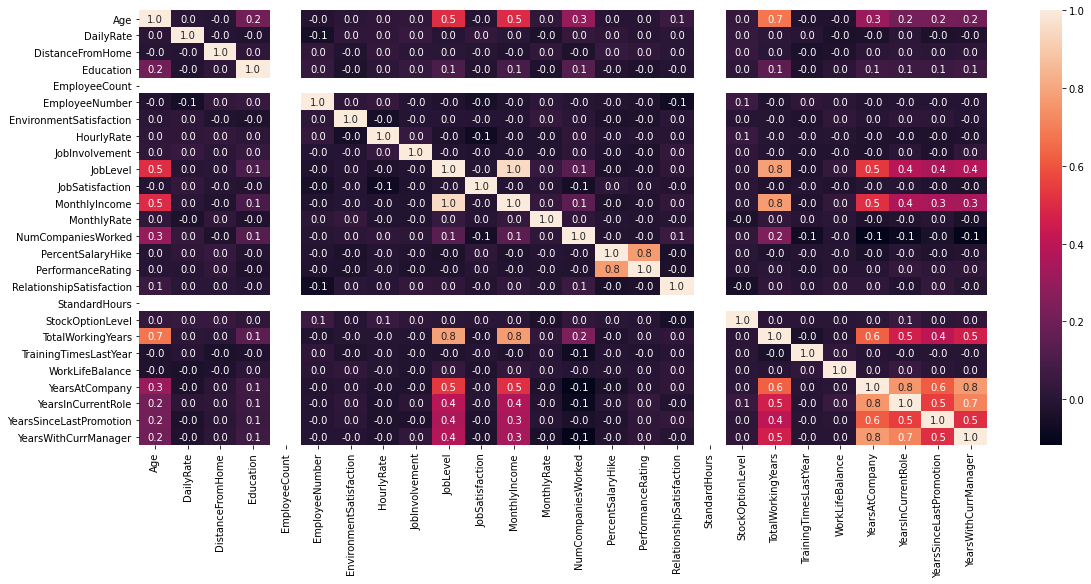

In [ ]:
plt.rcParams['figure.figsize']=(19,8)
sns.heatmap(df_e.corr(),annot=True,fmt='0.1f')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


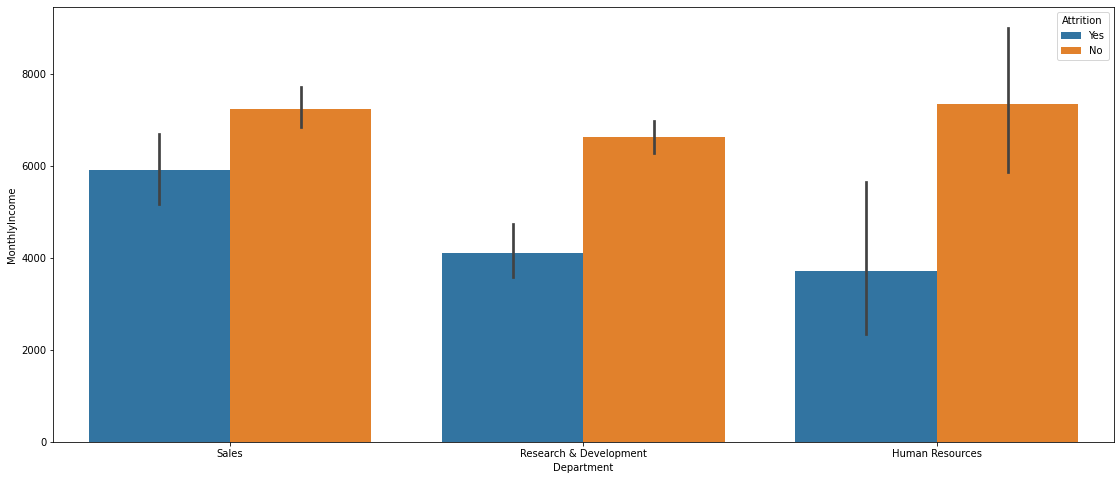

In [ ]:
sns.barplot(df_e['Department'],df_e['MonthlyIncome'],df_e['Attrition'])

Scatter Plot

In [ ]:
import plotly.express as px

In [ ]:
df_Iris=px.data.iris()

In [ ]:
df_Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



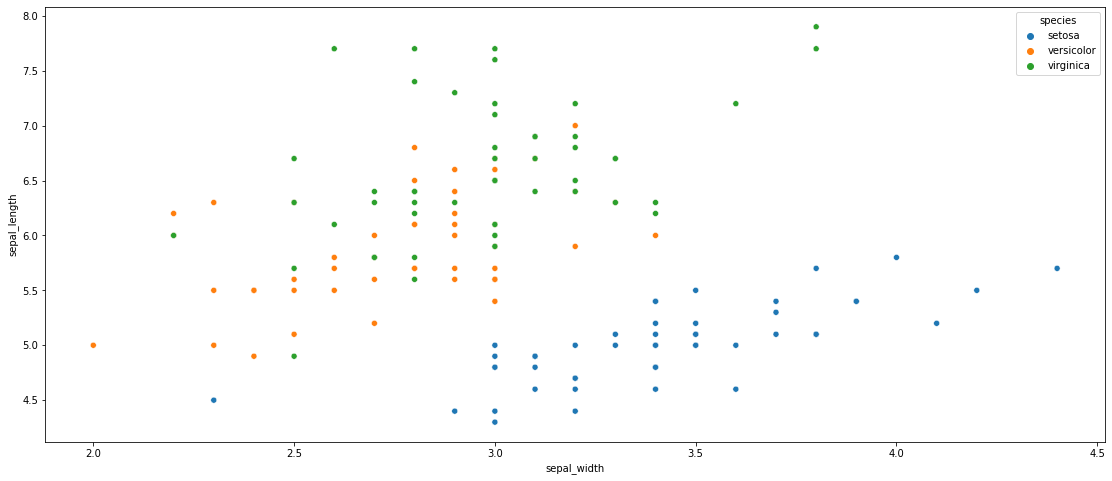

In [ ]:
sns.scatterplot(df_Iris['sepal_width'],df_Iris['sepal_length'],hue=df_Iris['species'])

In [ ]:
px.scatter(df_Iris,x="sepal_width",y="sepal_length",color="species")

In [ ]:
px.scatter(df_Iris,x="sepal_width",y="sepal_length",color="species",marginal_y="violin",marginal_x="box")

Bar,Line and Area

In [ ]:
data_g=px.data.gapminder()
data_g.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



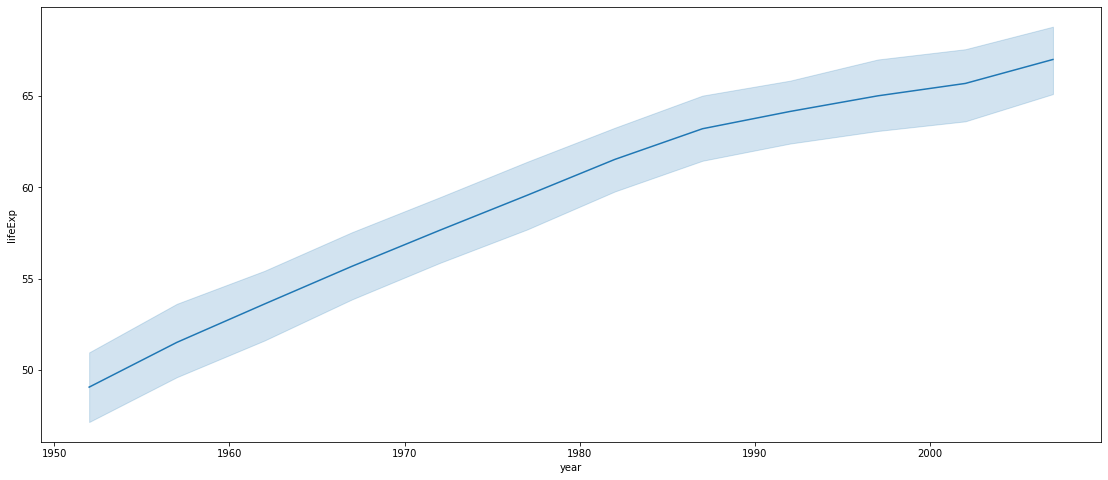

In [ ]:
sns.lineplot(data_g['year'],data_g['lifeExp'])

In [ ]:
px.area(data_g,x="year",y="pop",color="continent",line_group="country")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



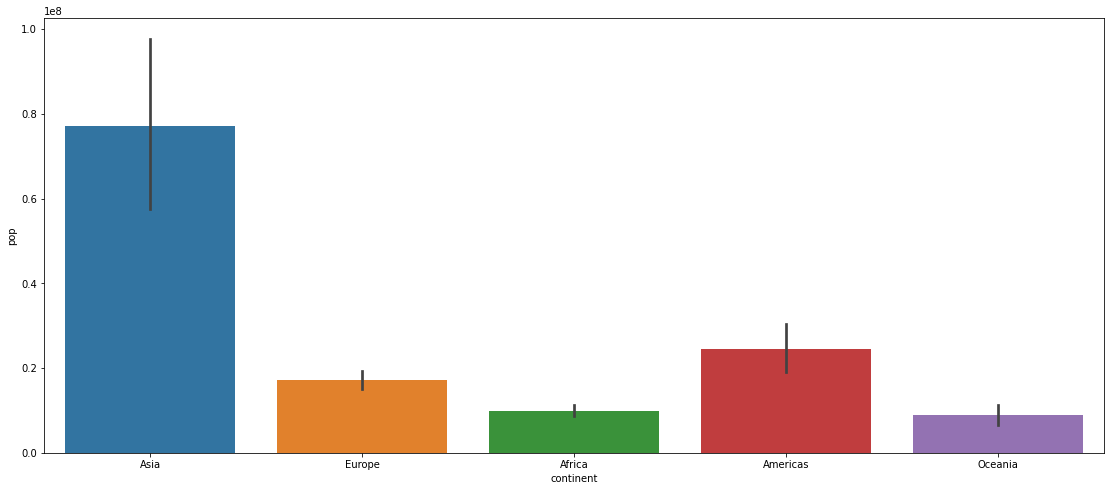

In [ ]:
sns.barplot(data_g['continent'],data_g['pop'])

In [ ]:
px.bar(data_g,x="continent",y="pop")

Facet Grids: Facet Grids also know as trell plots or small multiples, are figure madeup of multiple subplots which have the same set of axes,where each subplot shows the subset of the data.

In [ ]:
df_t=px.data.tips()
df_t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
px.bar(df_t,x="sex",y="total_bill",color="smoker",barmode="group")

In [ ]:
px.bar(df_t,x="sex",y="total_bill",color="smoker",barmode="group",facet_row="time",facet_col="day",category_orders={"day":["Thursday","Friday","Saturday","Sunday"],"time":["Lunch","Dinner"]})

In [ ]:
px.scatter(df_t,x="tip",y="total_bill",color="smoker",facet_row="time",facet_col="day",category_orders={"day":["Thursday","Friday","Saturday","Sunday"],"time":["Lunch","Dinner"]})

## Feature Engineering

1.Removing uneccessary columns

In [ ]:
df_emp=pd.read_csv('employee.csv')
df_emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_emp.shape

(1470, 35)

In [ ]:
df_emp["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [ ]:
df_emp["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [ ]:
df_emp["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [ ]:
#All the three columns has unique value for whole dataset.So removing these three columns will have not any affect on the target variable for determinig the results
df_emp=df_emp.drop(["EmployeeCount","Over18","StandardHours"],axis=1)

In [ ]:
df_emp.head(5)
df_emp.shape

(1470, 32)

In [ ]:
df_emp["EmployeeNumber"].nunique()

1470

In [ ]:
#As this column as all values different we can remove this column
df_emp=df_emp.drop(["EmployeeNumber"],axis=1)

In [ ]:
df_emp.shape

(1470, 31)

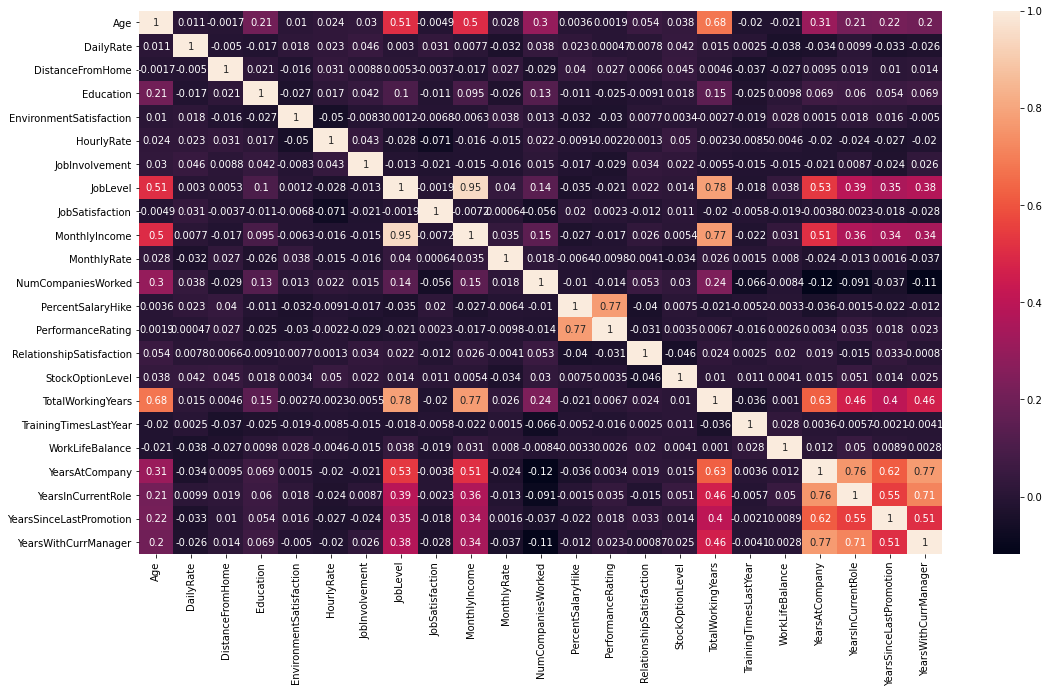

In [ ]:
plt.rcParams['figure.figsize']=(18,10)
sns.heatmap(df_emp.corr(),annot=True)
plt.show()

In [ ]:
#As Jobllevel is highy correlated with Monthly Income
#As variable years in company is highly correlated with years in current role and years with current manager
df_emp=df_emp.drop(["JobLevel","YearsInCurrentRole","YearsWithCurrManager"],axis=1)

In [ ]:
df_emp.shape

(1470, 28)

2. Decomposing Categorical Features

In [ ]:
df_fifa=pd.read_csv("fifa.csv")
df_fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
pd.set_option('max_rows',164)
df_fifa["Nationality"].value_counts()

Spain                   551
Brazil                  548
Argentina               466
France                  383
Germany                 351
England                 315
Italy                   306
Portugal                219
Colombia                188
Netherlands             176
Belgium                 126
Mexico                  115
Turkey                  108
Chile                    91
Sweden                   90
Uruguay                  87
United States            85
Serbia                   75
Denmark                  75
Austria                  71
Croatia                  70
Scotland                 68
Poland                   67
Switzerland              65
Senegal                  65
Japan                    64
Czech Republic           55
Norway                   54
Greece                   54
Ivory Coast              53
Paraguay                 52
Nigeria                  49
Morocco                  49
Ghana                    48
Ukraine                  47
Korea Republic      

In [ ]:
def decompose_categorical(x):
  if x=='Spain':
    return 'Spain'
  elif x=='Brazil':
    return 'Brazil'
  elif x=='Argentina':
    return 'Argentina'
  elif x=='Germany':
    return 'Germany'
  elif x=='France':
    return 'France'
  elif x=='England':
    return 'England'
  elif x=='Italy':
    return 'Italy'
  else:
    return 'Others'

df_fifa=df_fifa["Nationality"].apply(decompose_categorical)
df_fifa.value_counts()

Others       3328
Spain         551
Brazil        548
Argentina     466
France        383
Germany       351
England       315
Italy         306
Name: Nationality, dtype: int64

3. Binning Numerical Features

In [ ]:
data_emp=pd.read_csv("employee.csv")
data_emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data_emp["Age"].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [ ]:
#Defining hte binning function for age variable
def age_cat(x):
  if x>10 and x<20:
    return '10-20'
  elif x>20 and x<30:
    return '20-30'
  elif x>30 and x<40:
    return '30-40'
  elif x>40 and x<50:
    return '40-50'
  else:
    return '50-60'

data_emp=data_emp['Age'].apply(age_cat)
data_emp.value_counts()

30-40    562
50-60    301
20-30    298
40-50    292
10-20     17
Name: Age, dtype: int64

Aggregating Features

In [ ]:
df_student=pd.read_csv("Student.csv")
df_student.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_student["Total_Score"]=df_student["math score"]+df_student["reading score"]+df_student["writing score"]

In [ ]:
df_student.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [ ]:
df_student["Percentage"]=(df_student["Total_Score"]/300)*100

In [ ]:
df_student.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
def grade(x):
  if x>80:
    return 'A'
  elif x>70 and x<80:
    return 'B'
  elif x>60 and x<70:
    return 'C'
  elif x>50 and x<60:
    return 'D'
  elif x>40 and x<50:
    return 'E'
  else:
    return 'F'

df_student["Grade"]=df_student["Percentage"].apply(grade)

In [ ]:
df_student.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


Feature Engineering on Text Data

Reading and Summarizing the text

In [ ]:
df_amazon=pd.read_csv("amazon_alexa.tsv",delimiter="\t")
df_amazon.shape

(3150, 5)

In [ ]:
df_amazon.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df_amazon.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
print(df_amazon.describe())
df_amazon.describe(include='object')

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [ ]:
df_amazon["variation"].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [ ]:
df_amazon["Length"]=df_amazon["verified_reviews"].apply(len)

In [ ]:
df_amazon.head(5)

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


For finding the sentiments of the reviews i.e positive or negative review we will be using textblob library.
Textblob as a function called as "sentiment" which returns two properties "polarity" and "subjectivity".
Text Polarity:It is the expression that determines the sentimental aspect of an opinion.In textual data the result of sentimental analysis can be determined for each entity in the sentence or document. The sentiment polarity can be determined as positive,negative and neutral.
Polarity lies between -1 to 1 where -1:Negative ,+1:Positive and 0: Neutral

In [ ]:
from textblob import TextBlob

In [ ]:
def get_polarity(text):
  textblob=TextBlob(str(text.encode('utf-8')))
  pol=textblob.sentiment.polarity
  return pol

df_amazon["Polarity"]=df_amazon["verified_reviews"].apply(get_polarity)

Text Subjectivity: In natural language it refers to expression,opinions,values,feelings and speculations and thus incorporates sentiments.Subjective text is further classified with sentiment or polarity

In [ ]:
def get_subjectivity(text):
  textblob=TextBlob(str(text.encode('utf-8')))
  subj=textblob.sentiment.subjectivity
  return subj

df_amazon["Subjectivity"]=df_amazon["verified_reviews"].apply(get_subjectivity)

In [ ]:
df_amazon.head(5)

,rating,date,variation,verified_reviews,feedback,Length,Polarity,Subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625,0.6000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875,0.8000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100,0.5125
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350,0.4500
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000


Finding characters,punctuation and words count

In [ ]:
df_a=pd.read_csv("amazon_alexa.tsv",delimiter="\t")
df_a.shape

(3150, 5)

In [ ]:
df_a["char_count"]=df_a["verified_reviews"].apply(len)

In [ ]:
df_a["word_count"]=df_amazon["verified_reviews"].apply(lambda x: len(x.split()))

In [ ]:
import string
punctuation=string.punctuation

df_a["punctuation_count"]=df_amazon["verified_reviews"].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
df_a.head(5)

,rating,date,variation,verified_reviews,feedback,char_count,word_count,punctuation_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,4
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,0


Feature Engineering on titanic Dataset

In [ ]:
df_t=pd.read_csv("Titanic.csv")
df_t.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_t["Age"]=df_t["Age"].fillna(df_t["Age"].mean())
df_t["Cabin"]=df_t["Cabin"].fillna(df_t["Cabin"].mode()[0])
df_t["Embarked"]=df_t["Embarked"].fillna(df_t["Embarked"].mode()[0])

In [ ]:
df_t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



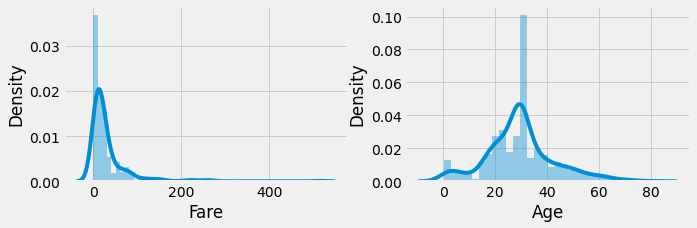

In [ ]:
plt.rcParams['figure.figsize']=(10,3)
plt.style.use("fivethirtyeight")

plt.subplot(1,2,1)
sns.distplot(df_t['Fare'])

plt.subplot(1,2,2)
sns.distplot(df_t['Age'])
plt.show()

In [ ]:
def fare_cat(x):
  if x<100:
    return 'Cheap'
  else:
    return "Expensive"

df_t["Fare"]=df_t["Fare"].apply(fare_cat)
df_t["Fare"].value_counts()

Cheap        838
Expensive     53
Name: Fare, dtype: int64

In [ ]:
def age_cat(x):
  if x<12:
    return "Kids"
  elif x>=12 and x<18:
    return "Grown Ups"
  elif x>=18 and x<35:
    return "Adults"
  elif x>35:
    return "Old"

df_t['Age']=df_t['Age'].apply(age_cat)
df_t['Age'].value_counts()

Adults       543
Old          217
Kids          68
Grown Ups     45
Name: Age, dtype: int64

In [ ]:
df_t['FamilySize']=df_t["SibSp"]+df_t["Parch"]+1
df_t['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [ ]:
def fam_cat(x):
  if x==1:
    return 'Alone'
  elif x>1 and x<=4:
    return "Small Family"
  else:
    return "Large Family"

df_t['FamilySize']=df_t['FamilySize'].apply(fam_cat)
df_t['FamilySize'].value_counts()

Alone           537
Small Family    292
Large Family     62
Name: FamilySize, dtype: int64

## Data Preprocessing

Encoding means conversion of categorical data into numerical data.
Encoding Techniques: 1. Label Encoding , 2. Feature Mapping , 
3. One Hot Encoding , 4. Binary Encoding , 5. BaseN Encoding
6. Target Encoding

1. Label Encoding

In [ ]:
df_big=pd.read_csv("BigMart.csv")
df_big.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_big.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_big=df_big.drop(["Item_Identifier"],axis=1)
df_big["Item_Weight"]=df_big["Item_Weight"].fillna(df_big["Item_Weight"].mean())
df_big["Outlet_Size"].fillna('Medium',inplace=True)

In [ ]:
df_big.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
#Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_big["Item_Fat_Content"]=le.fit_transform(df_big["Item_Fat_Content"])
df_big["Item_Type"]=le.fit_transform(df_big["Item_Type"])
df_big["Outlet_Identifier"]=le.fit_transform(df_big["Outlet_Identifier"])
df_big["Outlet_Size"]=le.fit_transform(df_big["Outlet_Size"])
df_big["Outlet_Location_Type"]=le.fit_transform(df_big["Outlet_Location_Type"])
df_big["Outlet_Type"]=le.fit_transform(df_big["Outlet_Type"])

In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   int64  
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 732.6 KB


In [ ]:
df_big.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


2. Feature Mapping

In [ ]:
df_big=pd.read_csv("BigMart.csv")
df_big.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_big=df_big.drop(["Item_Identifier"],axis=1)
df_big["Item_Weight"]=df_big["Item_Weight"].fillna(df_big["Item_Weight"].mean())
df_big["Outlet_Size"].fillna('Medium',inplace=True)

In [ ]:
df_big["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df_big.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_big["Outlet_Size"]=df_big["Outlet_Size"].replace(('High','Medium','Small'),(3,2,1))

In [ ]:
df_big["Outlet_Size"].value_counts()

2    5203
1    2388
3     932
Name: Outlet_Size, dtype: int64

3. OneHot Encoding: We use this when all values in the column as equal importance. for that column we cannot use label encoding or Feature maping so we use OneHot Encoding

In [ ]:
df_emp=pd.read_csv("employee.csv")
df_emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Here in the Department Column all Departments as equal importance so we use OneHot Encoding for this
x=pd.get_dummies(df_emp["Department"])

In [ ]:
x

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


In [ ]:
#Concatenating x with original dataset
df_emp=pd.concat([df_emp,x],axis=1)

In [ ]:
df_emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Research & Development,Sales
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0


In [ ]:
df_emp=df_emp.drop("Department",axis=1)

In [ ]:
df_emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Research & Development,Sales
0,41,Yes,Travel_Rarely,1102,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1
1,49,No,Travel_Frequently,279,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0
2,37,Yes,Travel_Rarely,1373,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0
4,27,No,Travel_Rarely,591,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1,0


4. Binary and 5. BaseN Encoding

Binary Encoding: If there are many different values for a column but all values as equal importance then in this case we cannot use onehot encoding as using this will create large number of columns which in case will increase the dimensionality of the dataset. So we use Binary Encoding in this case

In [ ]:
df_bigm=pd.read_csv("BigMart.csv")
df_bigm.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_bigm["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 5.7MB/s 


In [ ]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
x=be.fit_transform(df_bigm["Item_Type"])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
x

,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,1,0,1
...,...,...,...,...,...
8518,0,0,1,1,1
8519,0,0,1,1,0
8520,0,1,0,1,0
8521,0,0,1,1,1


In [ ]:
#Concatenating x with original dataset
df_bigm=pd.concat([df_bigm,x],axis=1)
df_bigm=df_bigm.drop("Item_Type",axis=1)
df_bigm.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0,0,0,1
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0,0,1,1
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0,0,1,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,1,0,1


BaseN Encoding

In [ ]:
df_f=pd.read_csv("fifa.csv")
df_f.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
x=be.fit_transform(df_f["Name"])
x

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,Name_11,Name_12,Name_13,Name_14,Name_15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,1
18203,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1
18204,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0
18205,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1


In [ ]:
import category_encoders as ce
a=ce.BaseNEncoder(cols=["Name"],base=4)
a=a.fit_transform(df_f[["Name"]])
a

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
18202,0,0,1,2,1,2,3,2,1
18203,0,1,0,0,3,0,2,1,3
18204,0,1,0,0,3,0,2,2,0
18205,0,1,0,0,3,0,2,2,1


Target Encoding: Mean and Fequency Encoding
Replacing the categorical values with any of the aggregate values of the target variable

In [ ]:
df_bigm=pd.read_csv("BigMart.csv")
df_bigm.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Finding the average sales based on Item Sales
x=df_bigm["Item_Outlet_Sales"].groupby(df_bigm["Item_Type"]).agg('mean')

In [ ]:
x

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
y=np.sort(df_bigm["Item_Type"].unique())

In [ ]:
df_bigm["Item_Type"]=df_bigm["Item_Type"].replace((y),(x.values))

In [ ]:
df_bigm.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,2232.542597,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,2006.511735,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,2158.977911,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,2289.009592,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,2258.784300,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Normal Distribution: It is the type of continuous probability distribution.It is symmetric about its mean,median and mode

Square and Cube root transformation

In [ ]:
df_bigm=pd.read_csv("BigMart.csv")
df_bigm.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


QQ Plot: A QQ plot is a scatter plot created by plotting two sets of quantities against each other. Tf both sets of quantities came from the same distribution we should see the points forming a line that roughly's straight

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



mean=2181.29 and standard deviation=1706.40


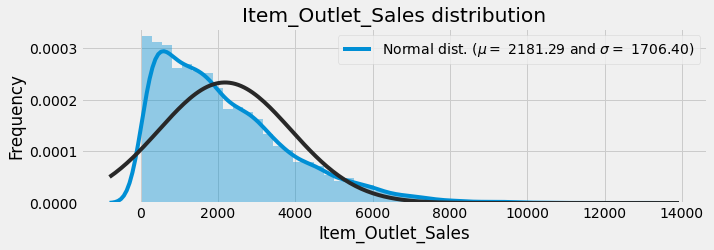

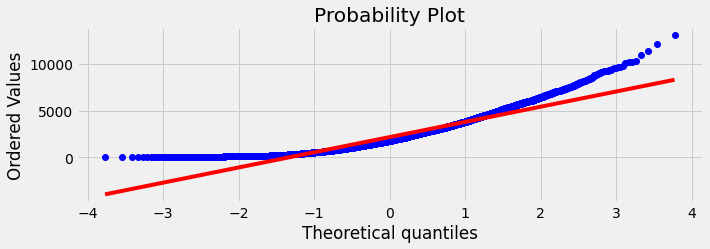

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_bigm["Item_Outlet_Sales"],fit=norm)

#Get the fitted parameters used by the function
(mu,sigma)=norm.fit(df_bigm["Item_Outlet_Sales"])
print('mean={:.2f} and standard deviation={:.2f}'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title("Item_Outlet_Sales distribution")

#Get also the QQ plot
fig=plt.figure()
res=stats.probplot(df_bigm["Item_Outlet_Sales"],plot=plt)
plt.show()

Comment: From the second graph it is clear that it is skewed

In [ ]:
#Square Root transformation
df_bigm["Item_Outlet_Sales"]=np.sqrt(df_bigm["Item_Outlet_Sales"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



mean=42.94 and standard deviation=18.36


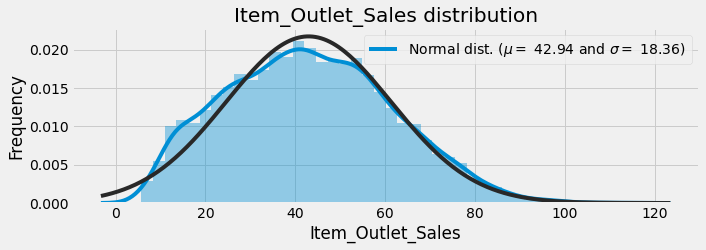

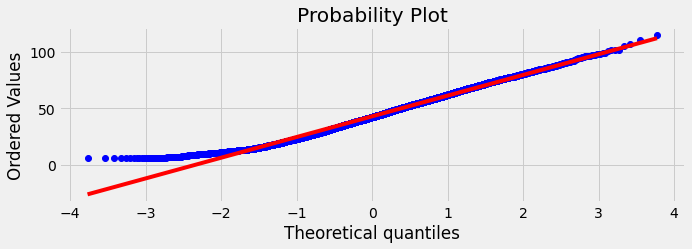

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_bigm["Item_Outlet_Sales"],fit=norm)

#Get the fitted parameters used by the function
(mu,sigma)=norm.fit(df_bigm["Item_Outlet_Sales"])
print('mean={:.2f} and standard deviation={:.2f}'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title("Item_Outlet_Sales distribution")

#Get also the QQ plot
fig=plt.figure()
res=stats.probplot(df_bigm["Item_Outlet_Sales"],plot=plt)
plt.show()

In [ ]:
df_bigm=pd.read_csv("BigMart.csv")

In [ ]:
#Cube Root transformation
df_bigm["Item_Outlet_Sales"]=np.cbrt(df_bigm["Item_Outlet_Sales"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



mean=11.99 and standard deviation=3.58


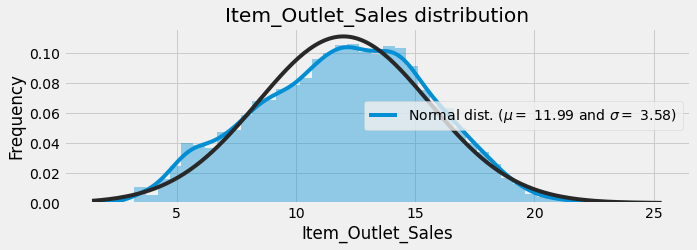

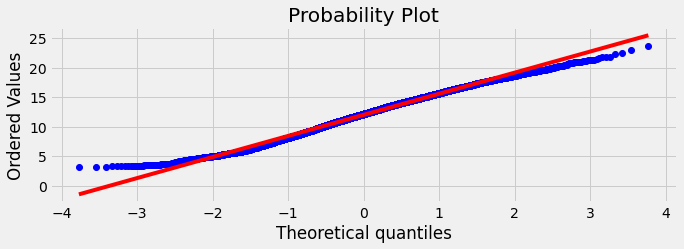

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_bigm["Item_Outlet_Sales"],fit=norm)

#Get the fitted parameters used by the function
(mu,sigma)=norm.fit(df_bigm["Item_Outlet_Sales"])
print('mean={:.2f} and standard deviation={:.2f}'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title("Item_Outlet_Sales distribution")

#Get also the QQ plot
fig=plt.figure()
res=stats.probplot(df_bigm["Item_Outlet_Sales"],plot=plt)
plt.show()

Log Transformation

In [ ]:
df_bigm=pd.read_csv("BigMart.csv")

In [ ]:
#Log transformation
df_bigm["Item_Outlet_Sales"]=np.log(df_bigm["Item_Outlet_Sales"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



mean=7.30 and standard deviation=1.02


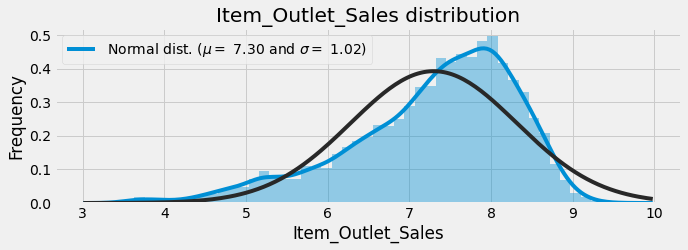

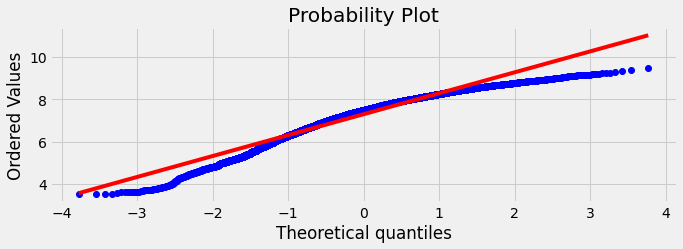

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_bigm["Item_Outlet_Sales"],fit=norm)

#Get the fitted parameters used by the function
(mu,sigma)=norm.fit(df_bigm["Item_Outlet_Sales"])
print('mean={:.2f} and standard deviation={:.2f}'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title("Item_Outlet_Sales distribution")

#Get also the QQ plot
fig=plt.figure()
res=stats.probplot(df_bigm["Item_Outlet_Sales"],plot=plt)
plt.show()

Train,Test and Validation Split

In [ ]:
df_I=pd.read_csv("Iris.csv")
df_I.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_I=df_I.drop("Id",axis=1)

In [ ]:
df_I.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Splitting the dependent and independent data

X=df_I.iloc[:,:-1]
Y=df_I["Species"]
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (150, 4)
Shape of Y:  (150,)


In [ ]:
#Splitting the train and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of Y_test is: ",Y_test.shape)

Shape of X_train is:  (120, 4)
Shape of X_test is:  (30, 4)
Shape of Y_train is:  (120,)
Shape of Y_test is:  (30,)


In [ ]:
#Splitting the training dataset to obtain the validation set

from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=0)
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_valid is: ",X_valid.shape)
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of Y_valid is: ",Y_valid.shape)

Shape of X_train is:  (96, 4)
Shape of X_valid is:  (24, 4)
Shape of Y_train is:  (96,)
Shape of Y_valid is:  (24,)


Standardization

In [ ]:
df_I=pd.read_csv("Iris.csv")
df_I.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_I=df_I.drop("Id",axis=1)

In [ ]:
#Splitting the dependent and independent data

X=df_I.iloc[:,:-1]
Y=df_I["Species"]
print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (150, 4)
Shape of Y:  (150,)


In [ ]:
#Splitting the train and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of Y_test is: ",Y_test.shape)

Shape of X_train is:  (120, 4)
Shape of X_test is:  (30, 4)
Shape of Y_train is:  (120,)
Shape of Y_test is:  (30,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [ ]:
X_train_sc

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_mms=mms.fit_transform(X_train)
X_test_mms=mms.transform(X_test)

In [ ]:
X_train_mms

array([[0.58333333, 0.45833333, 0.75862069, 0.70833333],
       [0.30555556, 0.41666667, 0.5862069 , 0.58333333],
       [0.25      , 0.625     , 0.06896552, 0.04166667],
       [0.5       , 0.41666667, 0.65517241, 0.70833333],
       [0.58333333, 0.33333333, 0.77586207, 0.875     ],
       [0.25      , 0.29166667, 0.48275862, 0.54166667],
       [0.38888889, 0.75      , 0.10344828, 0.08333333],
       [0.47222222, 0.29166667, 0.68965517, 0.625     ],
       [0.44444444, 0.41666667, 0.53448276, 0.58333333],
       [0.41666667, 0.25      , 0.5       , 0.45833333],
       [0.69444444, 0.41666667, 0.75862069, 0.83333333],
       [0.11111111, 0.5       , 0.03448276, 0.04166667],
       [0.72222222, 0.45833333, 0.68965517, 0.91666667],
       [0.19444444, 0.625     , 0.0862069 , 0.20833333],
       [0.30555556, 0.70833333, 0.06896552, 0.04166667],
       [0.19444444, 0.        , 0.4137931 , 0.375     ],
       [0.61111111, 0.41666667, 0.75862069, 0.70833333],
       [0.66666667, 0.54166667,

## PCA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_I=pd.read_csv("Iris.csv")
df_I.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df_I.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
X=df_I.drop(["Id","Species"],axis=1)
Y=df_I["Species"]

In [ ]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_std=sd.fit_transform(X)

In [ ]:
print(X_std)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=4)
X_transform=pca.fit_transform(X_std)

In [ ]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


As we can see that initially we have selected pca components as 4 but doesn't make any sense because we apready have 4 coponents only we are using pca to reduce the number of components.So but getting variance we can see first 2 components cover almost 95% of variance which means they are important so we can input pca components as 2

In [ ]:
pca=PCA(n_components=2)
X_transform=pca.fit_transform(X_std)

In [ ]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


In [ ]:
print(X_transform)

In [ ]:
pca1=list(zip(*X_transform))[0]
pca2=list(zip(*X_transform))[1]

In [ ]:
color_dict={}
color_dict["Iris-setosa"]="green"
color_dict["Iris-versicolor"]="red"
color_dict["Iris-virginica"]="blue"

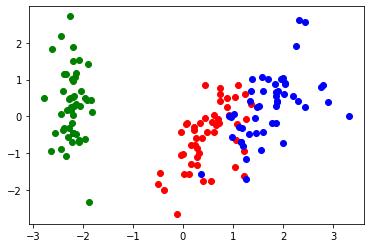

In [ ]:
i=0
for label in Y:
  plt.scatter(pca1[i],pca2[i],color=color_dict[label])
  i=i+1
plt.show()